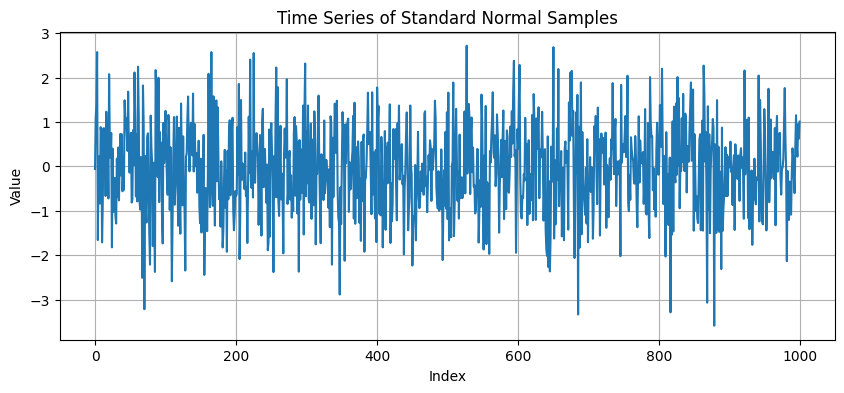

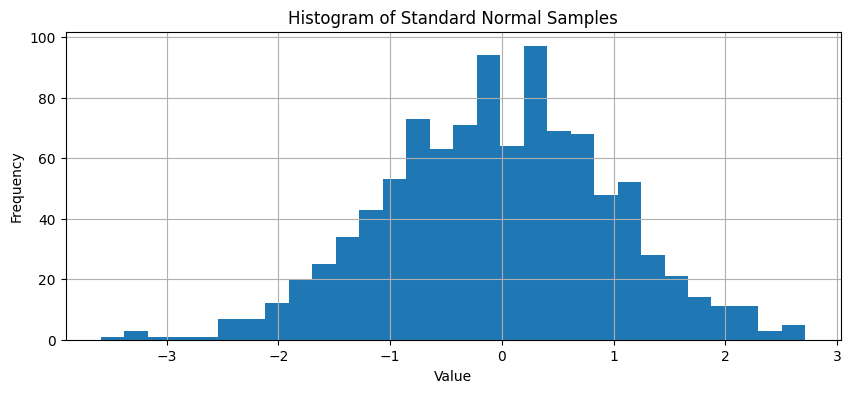

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 samples from standard normal distribution
data = np.random.randn(1000)

# ---- Time Series Plot ----
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("Time Series of Standard Normal Samples")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# ---- Histogram ----
plt.figure(figsize=(10, 4))
plt.hist(data, bins=30)
plt.title("Histogram of Standard Normal Samples")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


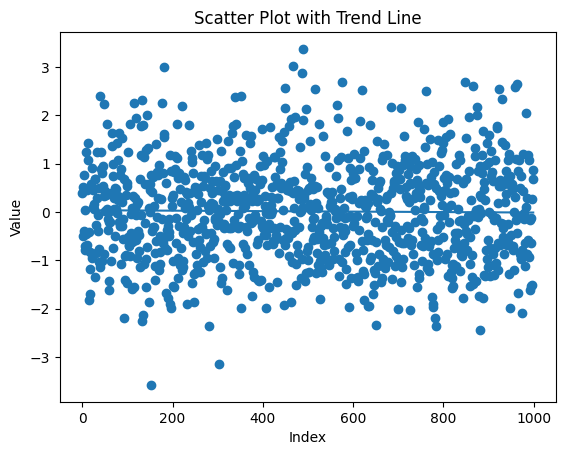

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 samples from standard normal distribution
data = np.random.randn(1000)

# X-axis: Index values
x = np.arange(len(data))
# print(f"{x}")

# ---- Scatter Plot with Trend Line ----

# Compute linear trend line using least squares
slope, intercept = np.polyfit(x, data, 1)
trend_line = slope * x + intercept

# Scatter plot
plt.figure()
plt.scatter(x, data)
plt.plot(x, trend_line)
plt.title("Scatter Plot with Trend Line")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

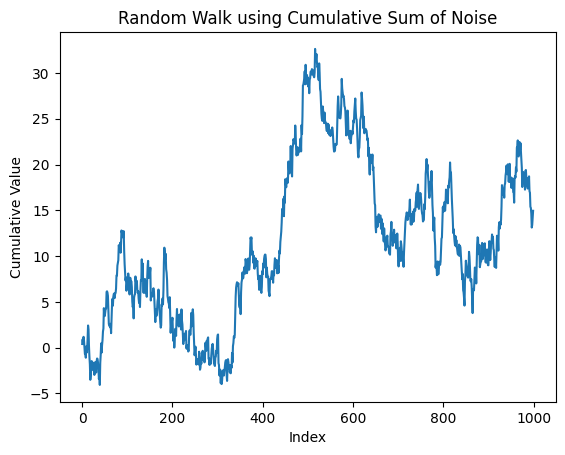

In [ ]:
cumulative_data = np.cumsum(data)

# Plot
plt.figure()
plt.plot(cumulative_data)
plt.title("Random Walk using Cumulative Sum of Noise")
plt.xlabel("Index")
plt.ylabel("Cumulative Value")
plt.show()

# starting project from here

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2025-10-26 15:25:46--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2025-10-26 15:25:46 (43.5 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
import pandas as pd

In [ ]:
from scipy.stats import boxcox

In [ ]:
pd.read_csv("airline_passengers.csv")


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df=pd.read_csv("airline_passengers.csv",index_col="Month",parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

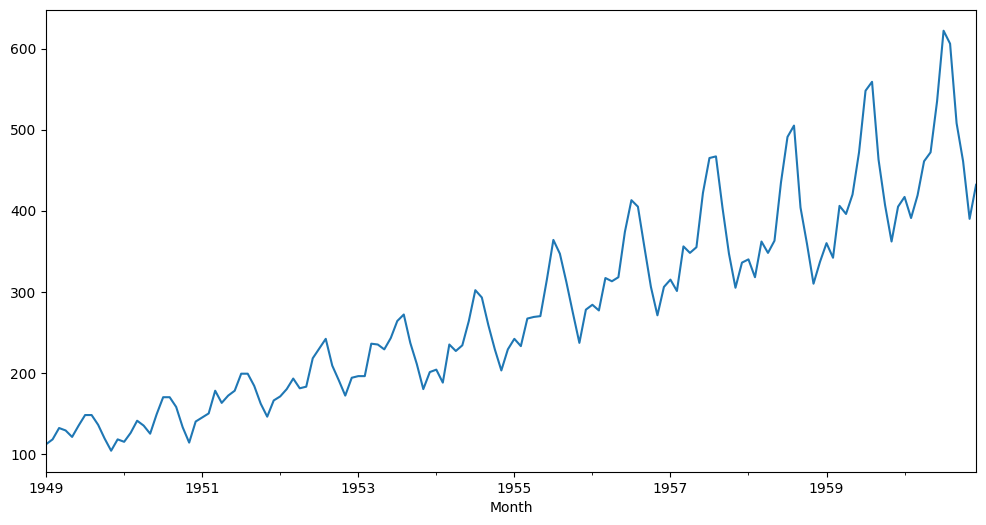

In [ ]:
df['Passengers'].plot(figsize=(12,6),label="passengers")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow import keras
from keras import layers,models
import numpy as np
import pandas as pd
from keras.utils import plot_model
from keras.preprocessing.image import load_img
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
from keras.losses import sparse_categorical_crossentropy
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
np.random.seed(123)
from keras.layers import concatenate
from keras.callbacks import ModelCheckpoint

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

--2025-10-26 16:08:10--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M  17.8MB/s    in 3.3s    

2025-10-26 16:08:14 (17.8 MB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]



In [ ]:
!unzip -nq UCI-HAR.zip

In [ ]:
!ls

 airline_passengers.csv   sample_data	     UCI-HAR.zip
 __MACOSX		 'UCI HAR Dataset'


In [ ]:
!head '/content/UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [ ]:
!ls '/content/UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [ ]:
!head '/content/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt'

  1.0766810e-002  6.5794800e-003  8.9288780e-003  7.4886830e-003  6.1409660e-003  6.9443170e-003  3.5524230e-003  2.5371280e-003  4.0845320e-003  5.1184480e-003  5.8922680e-003  7.2498710e-003  9.7907740e-003  7.6611380e-003  5.1893600e-003  6.8230790e-003  5.6069310e-003  4.7296470e-003  4.1832070e-003  7.0663390e-004 -4.5443680e-004 -2.4106740e-004 -5.4386880e-004 -9.4998440e-004 -1.4212070e-003 -1.3619990e-003 -2.3288400e-003 -3.9310100e-003 -4.6762190e-003 -1.3520500e-003  2.8577710e-003 -8.0455080e-004 -5.4479140e-003 -4.8100020e-003 -4.8692380e-003 -4.0803360e-003 -6.7911190e-004  1.6964250e-003  2.6872730e-003  3.0544240e-003  3.1148980e-003  2.0526290e-003  1.5152920e-003  2.0708300e-003 -6.2662310e-004 -4.5147720e-003 -5.9259230e-003 -5.0628050e-003 -2.2444770e-003 -7.8608780e-004 -1.2182820e-003 -1.6764070e-003 -2.2734320e-003 -4.8036130e-003 -8.8231540e-003 -8.7746350e-003 -7.3053960e-003 -8.2292200e-003 -8.1415060e-003 -7.2503280e-003 -5.5315810e-003 -4.4448610e-003 -3.6665

In [ ]:
df=pd.read_csv('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',delim_whitespace=True,header=None)
df

/tmp/ipython-input-869608771.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',delim_whitespace=True,header=None)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,-0.227949,-0.247119,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.311864,-0.316281,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.177051,-0.248426,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.240819,-0.330930,-0.396854,-0.413906,-0.379085,-0.356609,-0.317618,-0.315016,-0.330737,-0.272348


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,7352.0,-0.003374,0.198317,-0.857863,-0.038449,-0.000718,0.008661,1.133144
1,7352.0,-0.002858,0.197407,-0.897771,-0.037463,-0.000747,0.008745,1.091050
2,7352.0,-0.001708,0.197976,-0.975056,-0.036089,-0.000624,0.008930,1.097443
3,7352.0,-0.000536,0.196811,-0.984342,-0.033924,-0.000658,0.008600,1.046354
4,7352.0,0.000333,0.195771,-0.886248,-0.033026,-0.000719,0.008426,1.107588
...,...,...,...,...,...,...,...,...
123,7352.0,0.000752,0.194513,-0.746925,-0.023871,-0.000575,0.006518,1.128485
124,7352.0,0.001230,0.195691,-0.897870,-0.024126,-0.000617,0.006584,1.082167
125,7352.0,0.000948,0.196523,-0.865697,-0.022968,-0.000460,0.007144,1.180790
126,7352.0,0.000916,0.197047,-0.750321,-0.024064,-0.000694,0.006665,1.155468


<Axes: >

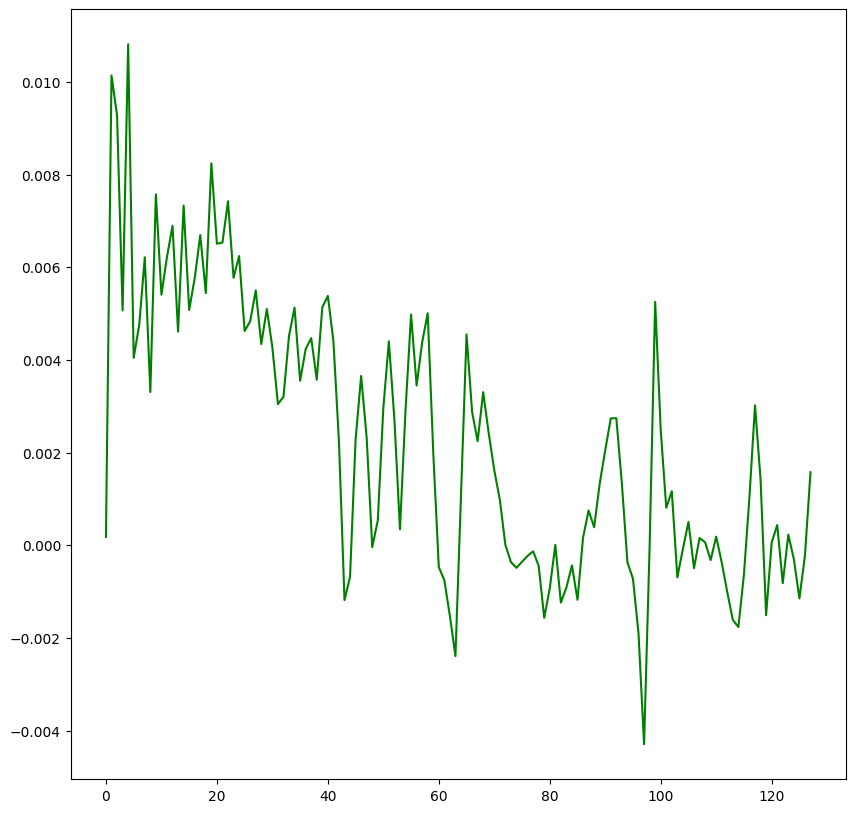

In [ ]:
df.iloc[0].plot(figsize=(10,10),color='green')

In [ ]:
df_test_sample=pd.read_csv('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt',delim_whitespace=True,header=None)
df_test_sample

/tmp/ipython-input-3962258478.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test_sample=pd.read_csv('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt',delim_whitespace=True,header=None)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.011653,0.013109,0.011269,0.027831,0.002318,-0.018965,-0.061920,-0.094248,-0.079534,-0.070084,...,-0.002944,-0.001247,0.002848,0.002355,0.002721,0.003255,0.001301,0.001292,0.001470,0.002574
1,0.009280,0.004930,0.003954,0.009214,0.016156,0.014079,0.013105,0.021247,0.026823,0.031054,...,-0.002533,0.000163,-0.001095,-0.004547,-0.005310,-0.004094,0.002200,0.007788,0.003433,-0.001239
2,0.005732,0.007066,0.005110,0.002434,0.002024,0.001382,0.001930,0.004875,0.003776,0.002400,...,-0.004972,-0.003586,-0.003860,-0.003560,-0.000974,0.001052,0.000778,-0.000743,-0.001923,-0.004305
3,0.000452,0.000604,-0.002485,-0.004562,-0.006002,-0.006382,-0.005276,-0.001489,0.005153,0.004951,...,0.001249,0.000978,0.002248,0.003530,-0.000117,-0.003275,-0.001325,0.000597,-0.000246,-0.000269
4,-0.004362,-0.002765,-0.004905,-0.004682,-0.000267,0.004135,0.005626,0.000933,-0.001542,0.003020,...,0.003601,0.004918,0.003647,0.002481,0.004855,0.006754,0.004633,0.002157,-0.000869,-0.001329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.107662,0.124079,0.183420,0.289247,0.393799,0.446456,0.436931,0.363053,0.279962,0.152701,...,-0.143304,-0.230325,-0.120717,-0.097928,-0.154805,-0.084908,-0.131883,-0.145651,-0.154956,-0.201542
2943,-0.042392,-0.017244,0.015269,0.064482,0.086802,0.084482,0.101578,0.130484,0.208370,0.310620,...,0.363840,0.561624,0.523547,0.366543,0.109336,-0.280305,-0.250735,0.049391,0.012861,0.035633
2944,-0.147647,-0.169903,-0.168698,-0.138600,-0.144781,-0.072979,-0.040348,-0.023016,-0.025176,-0.074406,...,0.098336,0.147866,0.168442,0.211400,0.328852,0.537643,0.638592,0.497893,0.214127,-0.114509
2945,0.071227,-0.088665,-0.070675,-0.116887,-0.214117,-0.219928,-0.275024,-0.229062,-0.245309,-0.242260,...,-0.041442,-0.083458,-0.085439,-0.100470,-0.067287,0.018514,0.097981,0.185988,0.273711,0.353674


<Axes: >

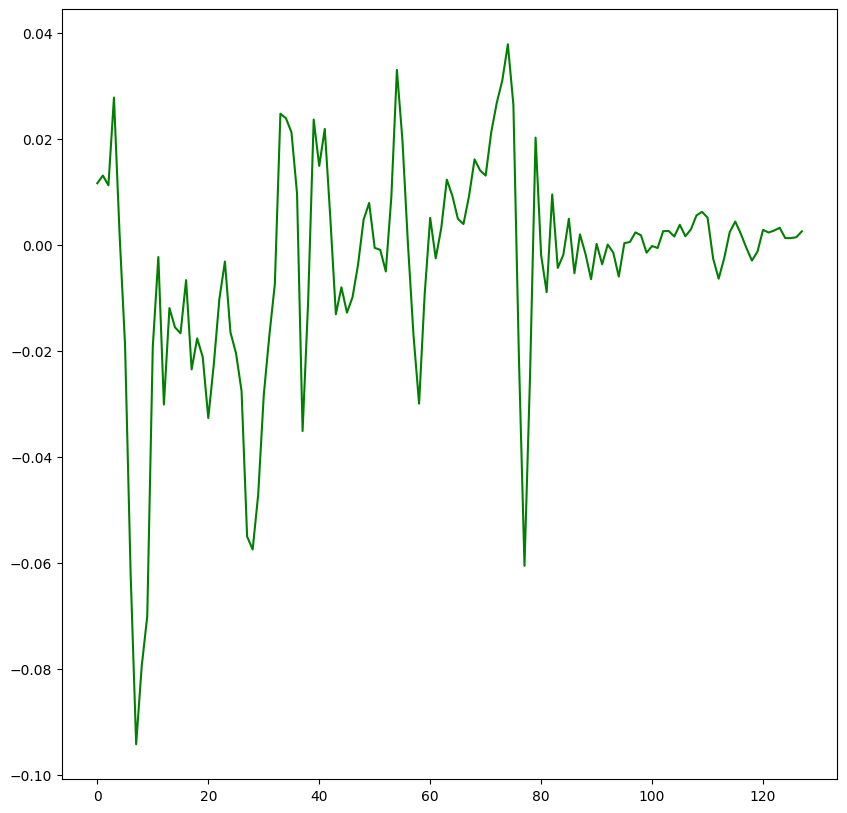

In [ ]:
df_test_sample.iloc[0].plot(figsize=(10,10),color='green')

In [ ]:
df_test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 2.9 MB


# we got our dimensions (NxDXT)


In [ ]:
T=128
Ntrain=7352 #rows
Ntest=2947
D=9 #total 9 files (accelaration,angular acc) 9 parallel time series
k=6 #no. of classes

In [ ]:
def load_data():
  Xtrain=np.zeros((Ntrain,T,D))
  Xtest=np.zeros((Ntest,T,D))

  ts_filenames=[
      'body_acc_x_train.txt',  'body_gyro_x_train.txt'  ,'total_acc_x_train.txt',
      'body_acc_y_train.txt' , 'body_gyro_y_train.txt' , 'total_acc_y_train.txt',
      "body_acc_z_train.txt"  ,'body_gyro_z_train.txt',  'total_acc_z_train.txt'

  ]

  ts_file_prefix='UCI HAR Dataset/train/'

  for d,fn in enumerate(ts_filenames):
    print(f"loading {fn}")

    df=pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        delim_whitespace=True,
        header=None
    )
    x=df.to_numpy()
    Xtrain[:,:,d]=x

  Ytrain=pd.read_csv(f'{ts_file_prefix}y_train.txt',header=None).to_numpy()-1
  Ytrain=Ytrain.flatten()


  # test data
  ts_filenames=[

    'body_acc_x_test.txt' , 'body_gyro_x_test.txt',  'total_acc_x_test.txt',
    "body_acc_y_test.txt"  ,'body_gyro_y_test.txt' , 'total_acc_y_test.txt',
    'body_acc_z_test.txt'  ,'body_gyro_z_test.txt',  'total_acc_z_test.txt'
  ]

  ts_file_prefix='UCI HAR Dataset/test/'

  for d,fn in enumerate(ts_filenames):
    print(f"loading {fn}")

    df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',
                   header=None,
                   delim_whitespace=True)
    x=df.to_numpy()
    Xtest[:,:,d]=x

  Ytest=pd.read_csv(f'{ts_file_prefix}y_test.txt',header=None).to_numpy()-1
  Ytest=Ytest.flatten()

  return Xtrain,Ytrain,Xtest,Ytest

In [ ]:
!ls '/content/UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [ ]:
Xtrain ,Ytrain,Xtest,Ytest=load_data()


loading body_acc_x_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading body_gyro_x_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading total_acc_x_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading body_acc_y_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading body_gyro_y_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading total_acc_y_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading body_acc_z_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading body_gyro_z_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading total_acc_z_train.txt


/tmp/ipython-input-660038978.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(


loading body_acc_x_test.txt
loading body_gyro_x_test.txt


/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',
/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',


loading total_acc_x_test.txt
loading body_acc_y_test.txt


/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',
/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',


loading body_gyro_y_test.txt
loading total_acc_y_test.txt


/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',
/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',


loading body_acc_z_test.txt
loading body_gyro_z_test.txt


/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',
/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',


loading total_acc_z_test.txt


/tmp/ipython-input-660038978.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',


In [ ]:
Xtrain.shape

(7352, 128, 9)

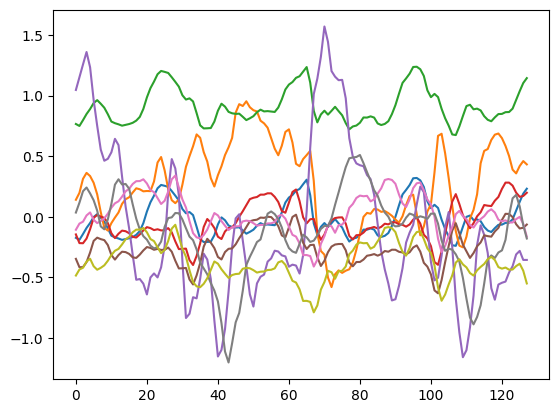

In [ ]:
plt.plot(Xtrain[2301,:,:]);
# 9 D time series of length T=128

# model building

In [ ]:
from keras.layers import Input,Dense,Concatenate
from tensorflow.keras.models import Model
features=[]
inputs=[]

# training univariate time series for all 9 D
for d in range(D):
  i=Input(shape=(T,))
  x=Dense(64,activation='relu')(i)
  x=Dense(32,activation='relu')(i)
  x=Dense(16,activation='relu')(i)
  inputs.append(i)
  features.append(x)

  x=Concatenate()(features)
  x=Dense(k)(x)
  model=Model(inputs,x)

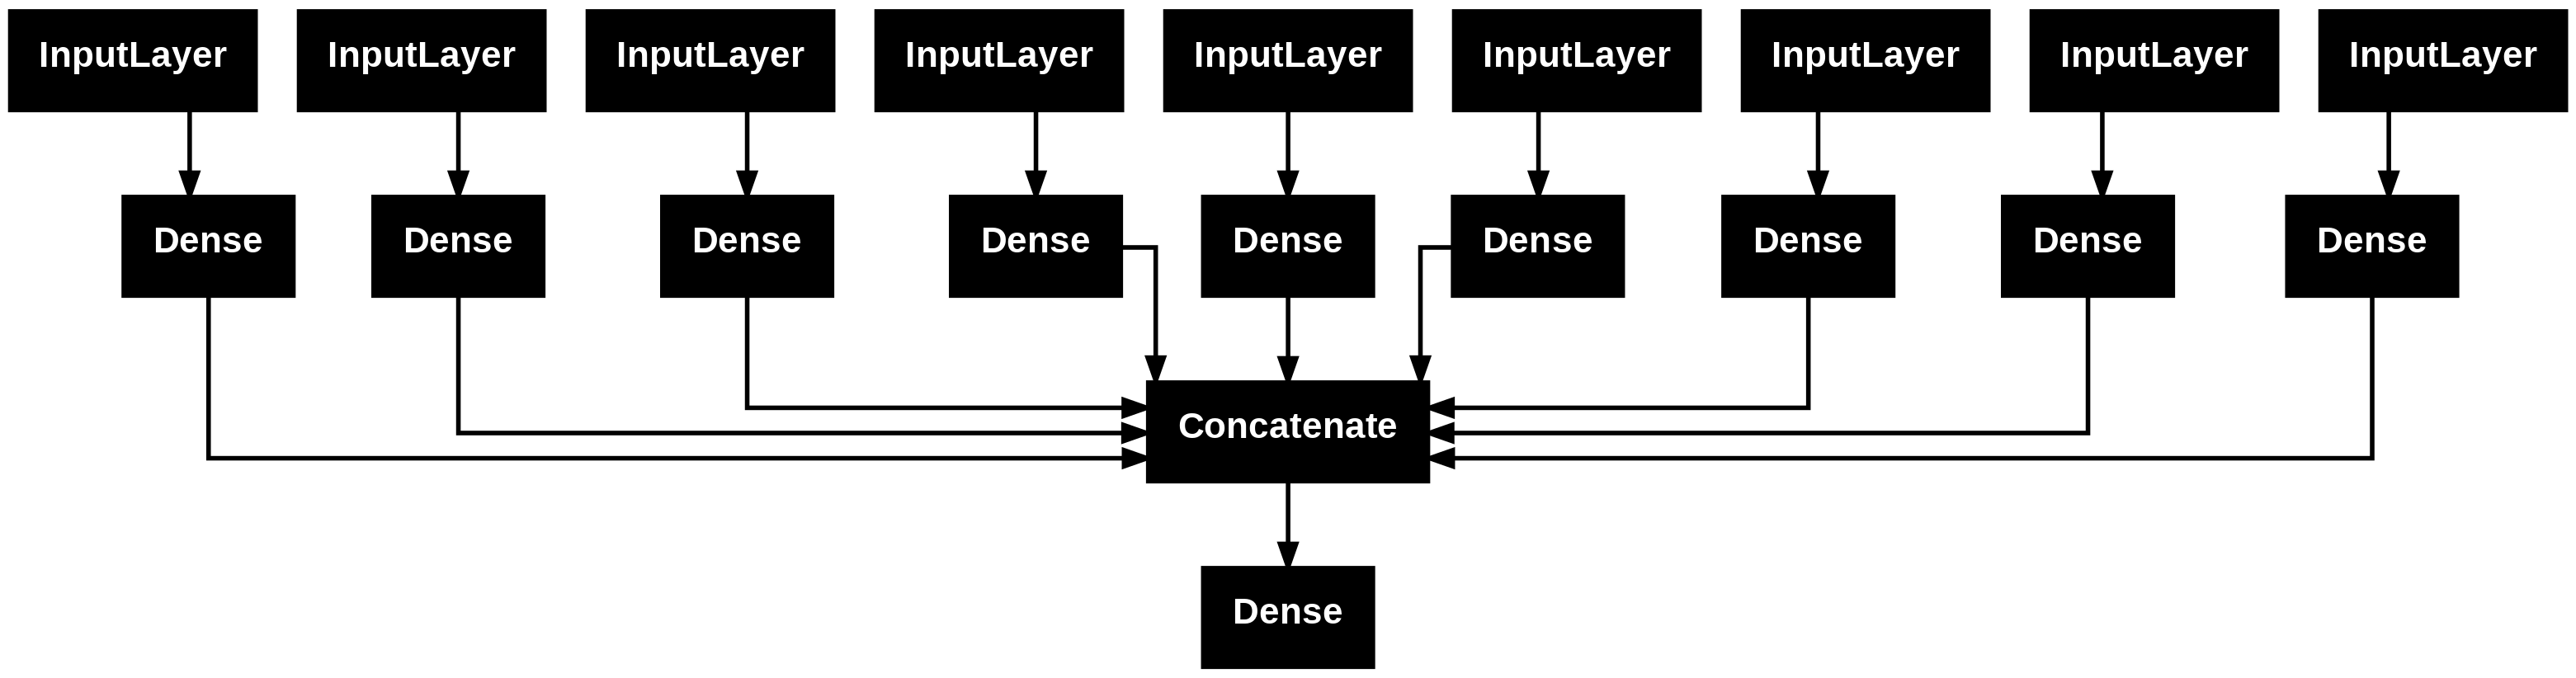

In [ ]:
keras.utils.plot_model(model)

In [ ]:
check_point=ModelCheckpoint('best_model.h5',monitor='val_accuracy',save_best_only=True)

In [ ]:
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

Xtrain_split=[]
Xtest_split=[]
for d in range(D):
  Xtrain_split.append(Xtrain[:,:,d])
  Xtest_split.append(Xtest[:,:,d])



In [ ]:
history=model.fit(
    Xtrain_split,
    Ytrain,
    epochs=20,
    validation_data=(Xtest_split,Ytest),
    callbacks=[check_point],
)

Epoch 1/20
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5838 - loss: 1.1433

230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5868 - loss: 1.1362 - val_accuracy: 0.7842 - val_loss: 0.6014
Epoch 2/20
218/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.3863

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8810 - loss: 0.3839 - val_accuracy: 0.8544 - val_loss: 0.4572
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9197 - loss: 0.2484 - val_accuracy: 0.8544 - val_loss: 0.3928
Epoch 4/20
218/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.2076

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9268 - loss: 0.2071 - val_accuracy: 0.8690 - val_loss: 0.3717
Epoch 5/20
225/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9390 - loss: 0.1832

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9390 - loss: 0.1830 - val_accuracy: 0.8782 - val_loss: 0.3419
Epoch 6/20
216/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9461 - loss: 0.1571

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9460 - loss: 0.1570 - val_accuracy: 0.8850 - val_loss: 0.3182
Epoch 7/20
229/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9434 - loss: 0.1543

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9434 - loss: 0.1542 - val_accuracy: 0.8870 - val_loss: 0.3281
Epoch 8/20
229/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.1271

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9565 - loss: 0.1272 - val_accuracy: 0.8884 - val_loss: 0.2987
Epoch 9/20
215/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9586 - loss: 0.1171

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9584 - loss: 0.1175 - val_accuracy: 0.8894 - val_loss: 0.2998
Epoch 10/20
227/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1187

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9576 - loss: 0.1187 - val_accuracy: 0.8918 - val_loss: 0.2914
Epoch 11/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9609 - loss: 0.1138 - val_accuracy: 0.8877 - val_loss: 0.2899
Epoch 12/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9637 - loss: 0.1012

230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9637 - loss: 0.1012 - val_accuracy: 0.8938 - val_loss: 0.2706
Epoch 13/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9573 - loss: 0.1101 - val_accuracy: 0.8938 - val_loss: 0.2916
Epoch 14/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9642 - loss: 0.0997 - val_accuracy: 0.8890 - val_loss: 0.2746
Epoch 15/20
219/230 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9643 - loss: 0.1017

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9643 - loss: 0.1015 - val_accuracy: 0.8948 - val_loss: 0.2742
Epoch 16/20
219/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.0905

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9670 - loss: 0.0907 - val_accuracy: 0.8979 - val_loss: 0.2878
Epoch 17/20
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9680 - loss: 0.0906

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9680 - loss: 0.0906 - val_accuracy: 0.9060 - val_loss: 0.2731
Epoch 18/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9675 - loss: 0.0894 - val_accuracy: 0.8955 - val_loss: 0.2935
Epoch 19/20
224/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.0849

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9681 - loss: 0.0851 - val_accuracy: 0.9070 - val_loss: 0.2593
Epoch 20/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9671 - loss: 0.0869 - val_accuracy: 0.9023 - val_loss: 0.2767


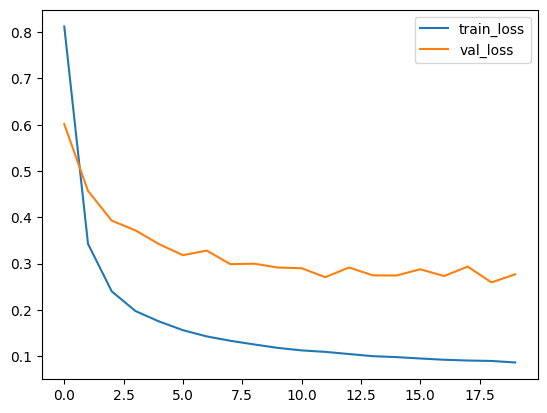

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend();

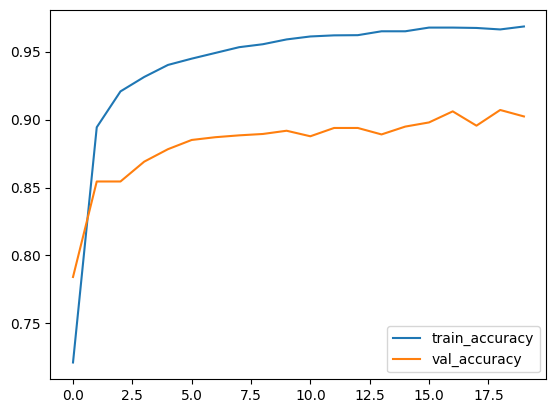

In [ ]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend();

#load best model

In [ ]:
best_model=tf.keras.models.load_model('best_model.h5')
pred=best_model.predict(Xtest_split)
pred=np.argmax(pred,axis=1)
print(classification_report(Ytest,pred))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       496
           1       0.85      0.96      0.90       471
           2       0.92      0.86      0.89       420
           3       0.87      0.84      0.85       491
           4       0.85      0.88      0.87       532
           5       1.00      0.96      0.98       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



In [ ]:
np.mean(pred==Ytest)

np.float64(0.9070240922972514)

In [ ]:
pred

array([4, 4, 4, ..., 1, 1, 1])

# using normal ml models with loading data with features only

In [ ]:
def load_features():
  df_train = pd.read_csv(
      'UCI HAR Dataset/train/X_train.txt',
      delim_whitespace=True,
      header=None # Added header=None to ensure all rows are read as data
  )
  new_train_features = df_train.to_numpy()

  df_test = pd.read_csv(
      'UCI HAR Dataset/test/X_test.txt',
      delim_whitespace=True,
      header=None # Added header=None
  )
  new_test_features = df_test.to_numpy()

  # Optional: Add a check to see the number of rows read
  print(f"Number of training features loaded: {new_train_features.shape[0]}")
  print(f"Number of testing features loaded: {new_test_features.shape[0]}")


  sc=StandardScaler()
  new_train_features=sc.fit_transform(new_train_features)
  new_test_features=sc.transform(new_test_features)

  return new_train_features,new_test_features

In [ ]:
new_train_features,new_test_features=load_features()

/tmp/ipython-input-2169245543.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_train = pd.read_csv(
/tmp/ipython-input-2169245543.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test = pd.read_csv(


Number of training features loaded: 7352
Number of testing features loaded: 2947


In [ ]:
dimension_new=new_train_features.shape
dimension_new

(7352, 561)

ann model

In [ ]:
i=Input(shape=(dimension_new[1],))
x=Dense(64,activation='relu')(i)
x=Dense(32,activation='relu')(x)
x=Dense(16,activation='relu')(x)
x=Dense(k)(x)
model_ann=Model(i,x)

In [ ]:
model_ann.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)
check_point_2=ModelCheckpoint('best_model_ann.h5',
                              monitor='val_accuracy',save_best_only=True)

In [ ]:
history_ann=model_ann.fit(
    new_train_features,
    Ytrain,
    epochs=20,
    validation_data=(new_test_features,Ytest),
    callbacks=[check_point_2],
)

Epoch 1/20
223/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7569 - loss: 0.6277

230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7611 - loss: 0.6172 - val_accuracy: 0.9016 - val_loss: 0.2348
Epoch 2/20
229/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.1050

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9617 - loss: 0.1049 - val_accuracy: 0.9328 - val_loss: 0.1712
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9712 - loss: 0.0711 - val_accuracy: 0.9253 - val_loss: 0.2383
Epoch 4/20
229/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0531

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9813 - loss: 0.0530 - val_accuracy: 0.9382 - val_loss: 0.1822
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0382 - val_accuracy: 0.9365 - val_loss: 0.2158
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0451 - val_accuracy: 0.9216 - val_loss: 0.3027
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9834 - loss: 0.0451 - val_accuracy: 0.9179 - val_loss: 0.3057
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0400 - val_accuracy: 0.9209 - val_loss: 0.2404
Epoch 9/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.9352 - val_loss: 0.2322
Epoch 10/20
221/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0297

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9872 - loss: 0.0295 - val_accuracy: 0.9450 - val_loss: 0.1871
Epoch 11/20
227/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0211

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9511 - val_loss: 0.1987
Epoch 12/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0170 - val_accuracy: 0.9410 - val_loss: 0.2234
Epoch 13/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.9471 - val_loss: 0.1994
Epoch 14/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0081 - val_accuracy: 0.9471 - val_loss: 0.2135
Epoch 15/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0119 - val_accuracy: 0.9328 - val_loss: 0.2811
Epoch 16/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0262 - val_accuracy: 0.9410 - val_loss: 0.2528
Epoch 17/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9393 - val_loss: 0.3061
Epoch 18/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9903 - loss: 0.0300 - val_accuracy: 0.9440

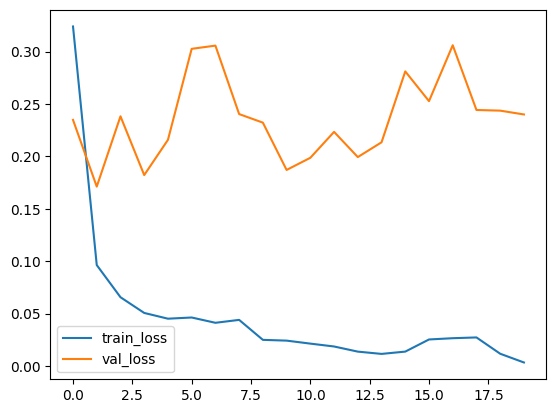

In [ ]:
plt.plot(history_ann.history['loss'],label='train_loss')
plt.plot(history_ann.history['val_loss'],label='val_loss')
plt.legend();

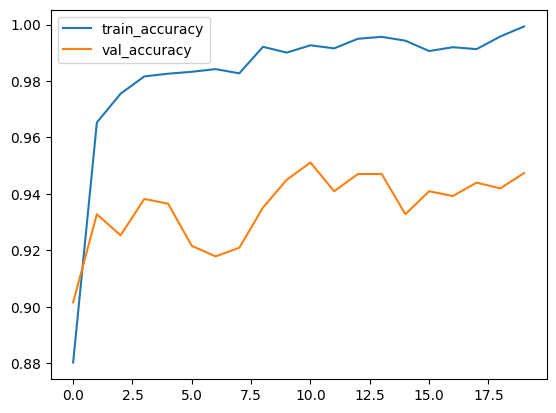

In [ ]:
plt.plot(history_ann.history['accuracy'],label='train_accuracy')
plt.plot(history_ann.history['val_accuracy'],label='val_accuracy')
plt.legend();

In [ ]:
est_model_new=tf.keras.models.load_model('best_model_ann.h5')
pred_new=est_model_new.predict(new_test_features)
pred_new=np.argmax(pred_new,axis=1)
print(classification_report(Ytest,pred_new))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       496
           1       0.92      0.97      0.95       471
           2       0.98      0.89      0.94       420
           3       0.97      0.88      0.92       491
           4       0.89      0.98      0.93       532
           5       1.00      0.98      0.99       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [ ]:
np.mean(pred_new==Ytest)

np.float64(0.9511367492365117)

# giving better accuracy from above time series model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=LogisticRegression(solver="saga")
model.fit(new_train_features,Ytrain)
pred=model.predict(new_test_features)
print(classification_report(Ytest,pred))
model.score(new_test_features,Ytest)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       496
           1       0.95      0.94      0.94       471
           2       0.98      0.93      0.96       420
           3       0.94      0.88      0.91       491
           4       0.88      0.95      0.91       532
           5       1.00      0.98      0.99       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9443501866304717

#better without any hyperpara
this suggest data can be seprable and close to decison boundary

In [ ]:
model=SVC(kernel='rbf')
model.fit(new_train_features,Ytrain)
pred=model.predict(new_test_features)
print(classification_report(Ytest,pred))
model.score(new_test_features,Ytest)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       496
           1       0.93      0.97      0.95       471
           2       0.98      0.92      0.95       420
           3       0.94      0.90      0.92       491
           4       0.92      0.95      0.93       532
           5       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



0.9521547336274178

In [ ]:
model=SVC(kernel='linear')
model.fit(new_train_features,Ytrain)
pred=model.predict(new_test_features)
print(classification_report(Ytest,pred))
model.score(new_test_features,Ytest)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       496
           1       0.96      0.96      0.96       471
           2       0.99      0.95      0.97       420
           3       0.96      0.88      0.92       491
           4       0.90      0.97      0.93       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



0.9609772650152698

data is lienarly sep

In [ ]:
model=RandomForestClassifier()
model.fit(new_train_features,Ytrain)
pred=model.predict(new_test_features)
print(classification_report(Ytest,pred))
model.score(new_test_features,Ytest)
#

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       496
           1       0.90      0.91      0.90       471
           2       0.97      0.86      0.91       420
           3       0.93      0.91      0.92       491
           4       0.92      0.93      0.92       532
           5       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



0.9321343739395996

In [ ]:
model.score(new_train_features,Ytrain),model.score(new_test_features,Ytest)
#(train,test) acc

(1.0, 0.9321343739395996)

# performing poor on test